In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [2]:
minst = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

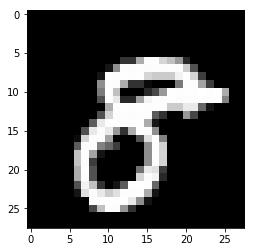

In [46]:
img = np.reshape(minst.train.images[29], [28, 28])
plt.imshow(img, cmap='gray')

In [5]:
from scipy.misc import imresize

c:\users\wsh-03\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


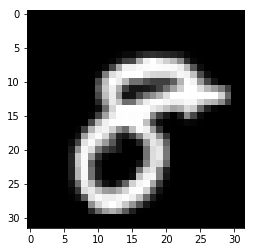

In [50]:
img32 = imresize(img, size=(32, 32), interp='bilinear')
plt.imshow(img32, cmap='gray')

In [7]:
X_trains = np.zeros((minst.train.images.shape[0], 32, 32, 1))
Y_trains = minst.train.labels
for i in range(X_trains.shape[0]):
    img = np.reshape(minst.train.images[i], [28, 28])
    X_trains[i][:, :, 0] = imresize(img, size=(32, 32), interp='bilinear')
    
X_test = np.zeros((minst.test.images.shape[0], 32, 32, 1))
for i in range(X_test.shape[0]):
    img = np.reshape(minst.test.images[i], [28, 28])
    X_test[i][:, :, 0] = imresize(img, size=(32, 32), interp='bilinear')
Y_test = minst.test.labels

c:\users\wsh-03\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """
c:\users\wsh-03\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [8]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 32, 32, 1], name="X")
Y = tf.placeholder(tf.float32, [None, 10], name='Y')

In [9]:
#conv1
def _conv2d(prev_layer, shape, strides, padding):
    initial = tf.truncated_normal(shape, stddev=0.1)
    W = tf.Variable(initial)
    b = tf.Variable(np.zeros(shape[-1]) + 0.1, dtype=tf.float32)
    return tf.nn.conv2d(prev_layer, W, strides=strides, padding=padding)
def _conv2d_relu(prev_layer, shape, strides, padding):
    return tf.nn.tanh(_conv2d(prev_layer, shape, strides, padding))
def _avgpool(prev_layer):
    return tf.nn.max_pool(prev_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
def _flatten(prev_layer, shape):
    return tf.reshape(prev_layer, prev_layer.shape)
def _fully_connect(prev_layer, outsize):
    initial = tf.truncated_normal([prev_layer.shape[-1], outsize], stddev=0.1)
    W = tf.Variable(initial)
    b = tf.Variable(np.zeros(outsize), dtype=tf.float32)
    return tf.matmul(prev_layer, W) + b

In [10]:
conv1 = _conv2d_relu(X, [5, 5, 1, 6], strides=[1, 1, 1, 1], padding="VALID")

In [11]:
# x = np.random.randn(1, 32, 32, 1)
# sess = tf.Session()
# init = tf.global_variables_initializer()
# sess.run(init)
# out = sess.run(conv1, feed_dict={X:x})
# print(out.shape)

In [12]:
avgpool1 = _avgpool(conv1)

In [13]:
conv2 = _conv2d_relu(avgpool1, [5, 5, 6, 16], strides=[1, 1, 1, 1], padding='VALID')

In [14]:
avgpool2 = _avgpool(conv2)

In [15]:
avgpool2_flat = tf.reshape(avgpool2, [-1, 5*5*16])

In [16]:
initial = tf.truncated_normal([400, 120], stddev=0.1)
W_fc1 = tf.Variable(initial)
b_fc1 = tf.Variable(np.zeros(120), dtype='float32')
fc1 = tf.nn.relu(tf.matmul(avgpool2_flat, W_fc1) + b_fc1)

In [17]:
initial = tf.truncated_normal([120, 84], stddev=0.1)
W_fc2 = tf.Variable(initial)
b_fc2 = tf.Variable(np.zeros(84), dtype='float32')
fc2 = tf.nn.relu(tf.matmul(fc1, W_fc2) + b_fc2)

In [18]:
initial = tf.truncated_normal([84, 10], stddev=0.1)
W_fc3 = tf.Variable(initial)
b_fc3 = tf.Variable(np.zeros(10), dtype='float32')
y_conv = tf.nn.softmax(tf.matmul(fc2, W_fc3) + b_fc3)

In [19]:
# sess.close()
# sess = tf.Session()
# init = tf.global_variables_initializer()
# sess.run(init)
# out = sess.run(y_conv, feed_dict={X:x})
# print(out)

In [20]:
cross_entropy = -tf.reduce_sum(Y * tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_predection = tf.equal(tf.argmax(y_conv, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predection, 'float'))

In [21]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
batch_size = 50
step = X_trains.shape[0] // batch_size
for i in range(30000):
    s = i % step
    batch = (X_trains[s*batch_size:(s+1)*batch_size,:], Y_trains[s*batch_size:(s+1)*batch_size,:])
    sess.run(train_step, feed_dict={X: batch[0], Y: batch[1]})
    if i%100 ==0:
        train_accuracy = accuracy.eval(session=sess, feed_dict={X:batch[0], Y: batch[1]})
        print("step %d, training accuracy %g"%(i, train_accuracy)) 

step 0, training accuracy 0.1
step 100, training accuracy 0.6
step 200, training accuracy 0.86
step 300, training accuracy 0.72
step 400, training accuracy 0.92
step 500, training accuracy 0.88
step 600, training accuracy 0.98
step 700, training accuracy 0.96
step 800, training accuracy 0.78
step 900, training accuracy 0.94
step 1000, training accuracy 0.88
step 1100, training accuracy 0.92
step 1200, training accuracy 0.94
step 1300, training accuracy 0.96
step 1400, training accuracy 0.92
step 1500, training accuracy 0.98
step 1600, training accuracy 0.96
step 1700, training accuracy 0.98
step 1800, training accuracy 0.98
step 1900, training accuracy 0.88
step 2000, training accuracy 1
step 2100, training accuracy 0.96
step 2200, training accuracy 0.94
step 2300, training accuracy 0.96
step 2400, training accuracy 0.98
step 2500, training accuracy 0.92
step 2600, training accuracy 1
step 2700, training accuracy 0.96
step 2800, training accuracy 1
step 2900, training accuracy 0.98
ste

step 25100, training accuracy 1
step 25200, training accuracy 1
step 25300, training accuracy 1
step 25400, training accuracy 1
step 25500, training accuracy 1
step 25600, training accuracy 1
step 25700, training accuracy 1
step 25800, training accuracy 1
step 25900, training accuracy 1
step 26000, training accuracy 1
step 26100, training accuracy 1
step 26200, training accuracy 1
step 26300, training accuracy 1
step 26400, training accuracy 1
step 26500, training accuracy 1
step 26600, training accuracy 1
step 26700, training accuracy 1
step 26800, training accuracy 1
step 26900, training accuracy 1
step 27000, training accuracy 1
step 27100, training accuracy 1
step 27200, training accuracy 1
step 27300, training accuracy 1
step 27400, training accuracy 1
step 27500, training accuracy 1
step 27600, training accuracy 1
step 27700, training accuracy 1
step 27800, training accuracy 1
step 27900, training accuracy 1
step 28000, training accuracy 1
step 28100, training accuracy 1
step 282

In [22]:
print("test accuracy %g"%accuracy.eval(session=sess, feed_dict={X:X_test, Y: Y_test}))

test accuracy 0.9833


In [167]:
print(len(X_test))

10000


In [27]:
# 获取可训练变量列表，可用于指定训练哪一部分变量(梯度下降)
var_list = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

In [33]:
print(var_list[8])

<tf.Variable 'Variable_8:0' shape=(84, 10) dtype=float32_ref>


In [34]:
saver = tf.train.Saver()

In [43]:
# 保存变量
save_file = './LeNet-pretrained-on-mnist/LeNet-5-on-mnist'
saver.save(sess, save_file, global_step=30000)

'./LeNet-pretrained-on-mnist/LeNet-5-on-mnist-30000'

In [44]:
# 保存图
writer = tf.summary.FileWriter('./LeNet-pretrained-on-mnist', sess.graph)